# Hypothesis Verification
This notebook verifies the following hypotheses:
1. Traffic follows a cycle with pattern
2. High traffic IP occurs at specific time in a day/ month
3. High frequency -> large file size, or vice versa, or no relation
4. Traffic at weekday is less than traffic at weekend

In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plot_utils

# Setup Paths
cwd = os.getcwd()
if cwd.endswith("eda"):
    BASE_DIR = os.path.join(cwd, "..")
else:
    # Fallback if running from root
    BASE_DIR = "."

processed_dir = os.path.join(BASE_DIR, "data", "processed")

# Load Data
print("Loading data...")
df = pd.read_csv(os.path.join(processed_dir, "train.csv"))
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df.sort_index(inplace=True)
df['status'] = df['status'].astype(str)
print(f"Data loaded: {df.shape}")

Loading data...
Data loaded: (2934932, 10)


## Hypothesis 1: Traffic follows a cycle with pattern

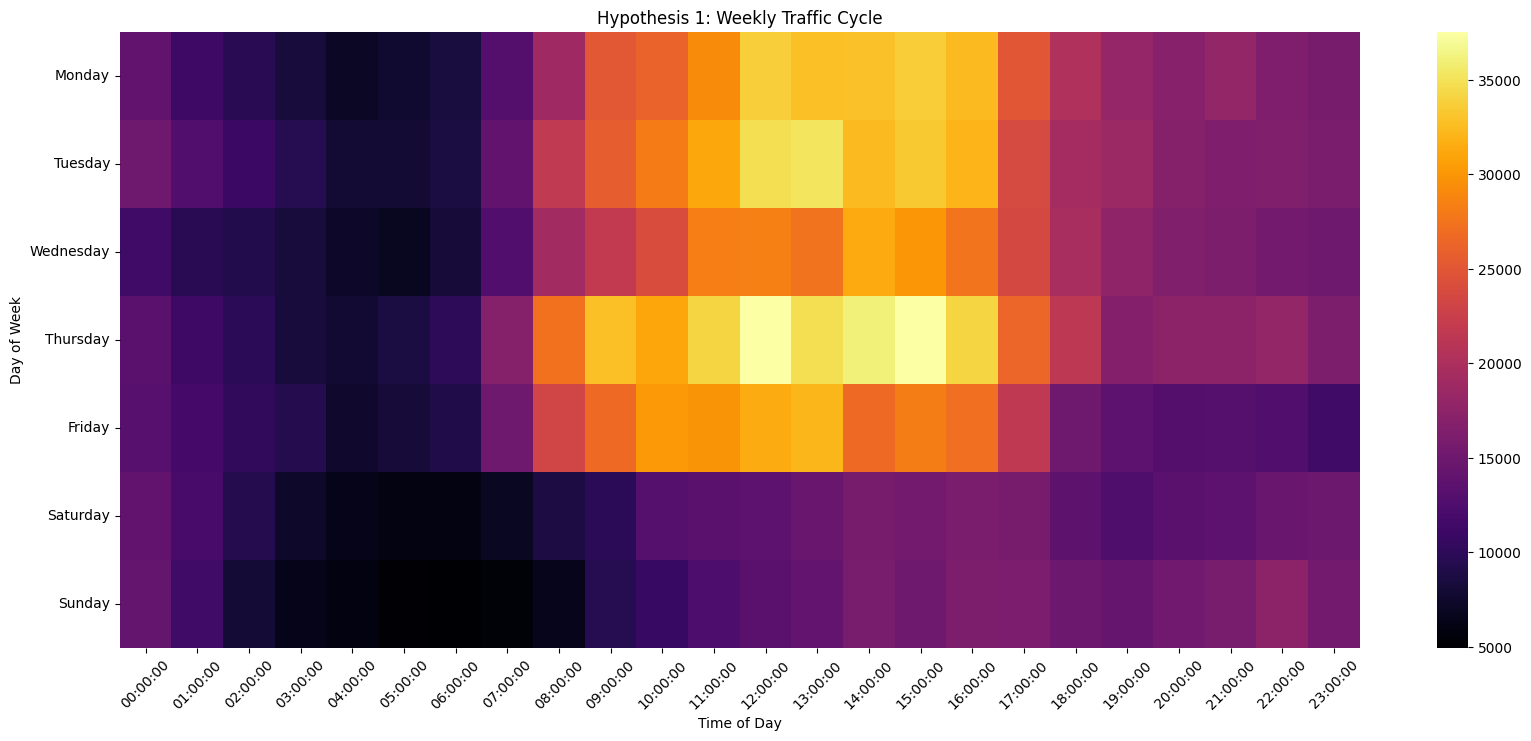

In [2]:
plot_utils.plot_weekly_heatmap(df, interval='1h', title='Hypothesis 1: Weekly Traffic Cycle')

Autocorrelation - Hits:
Calculating Autocorrelation for hits...


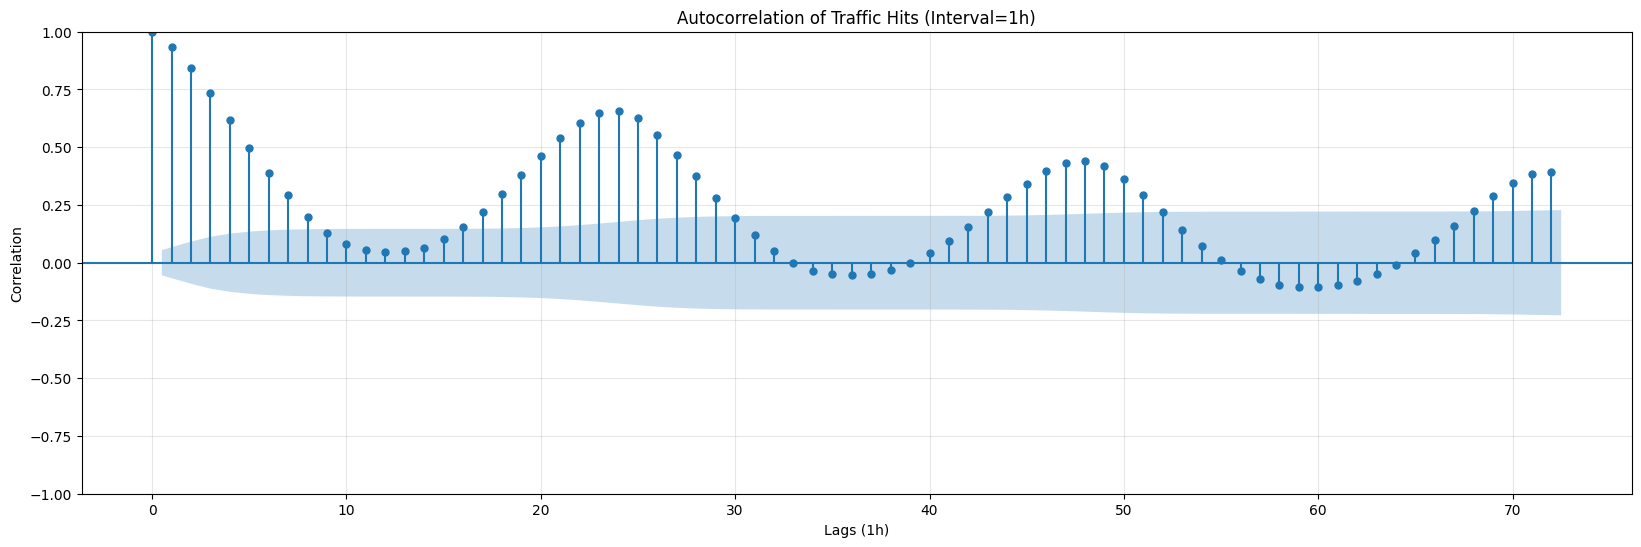

Autocorrelation - File Size:
Calculating Autocorrelation for size...


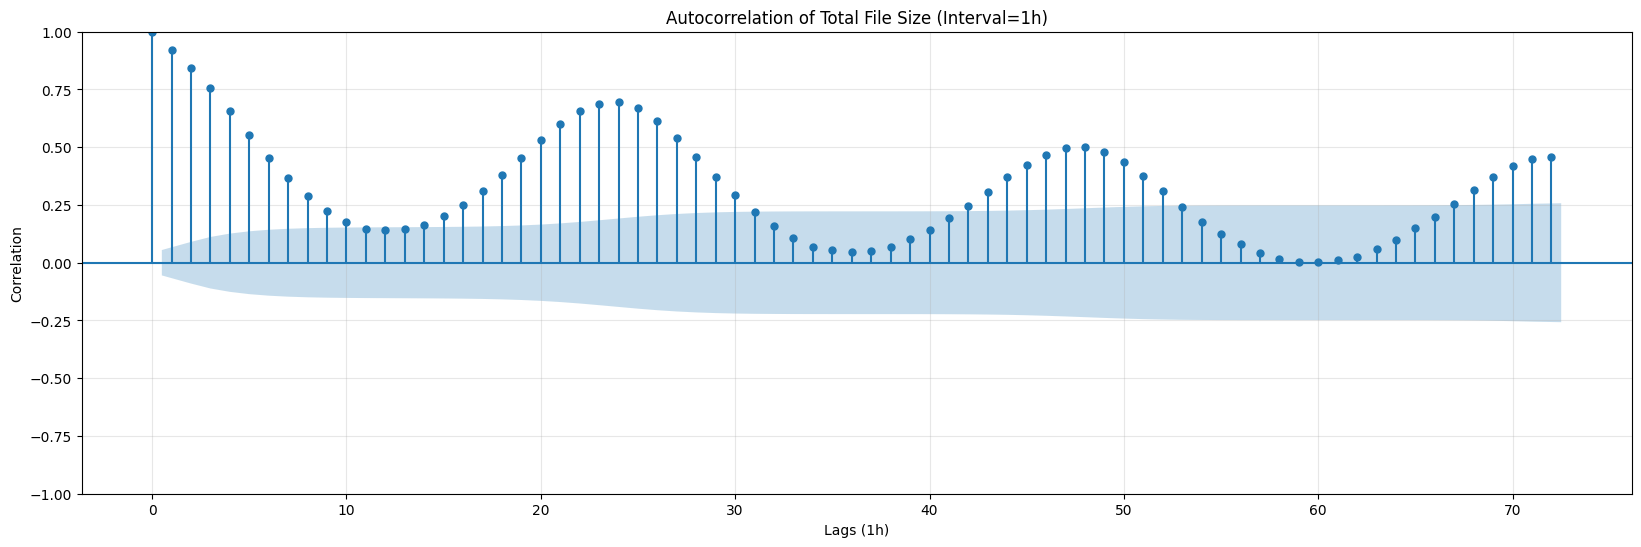

Autocorrelation - Success Rate:
Calculating Autocorrelation for rate...


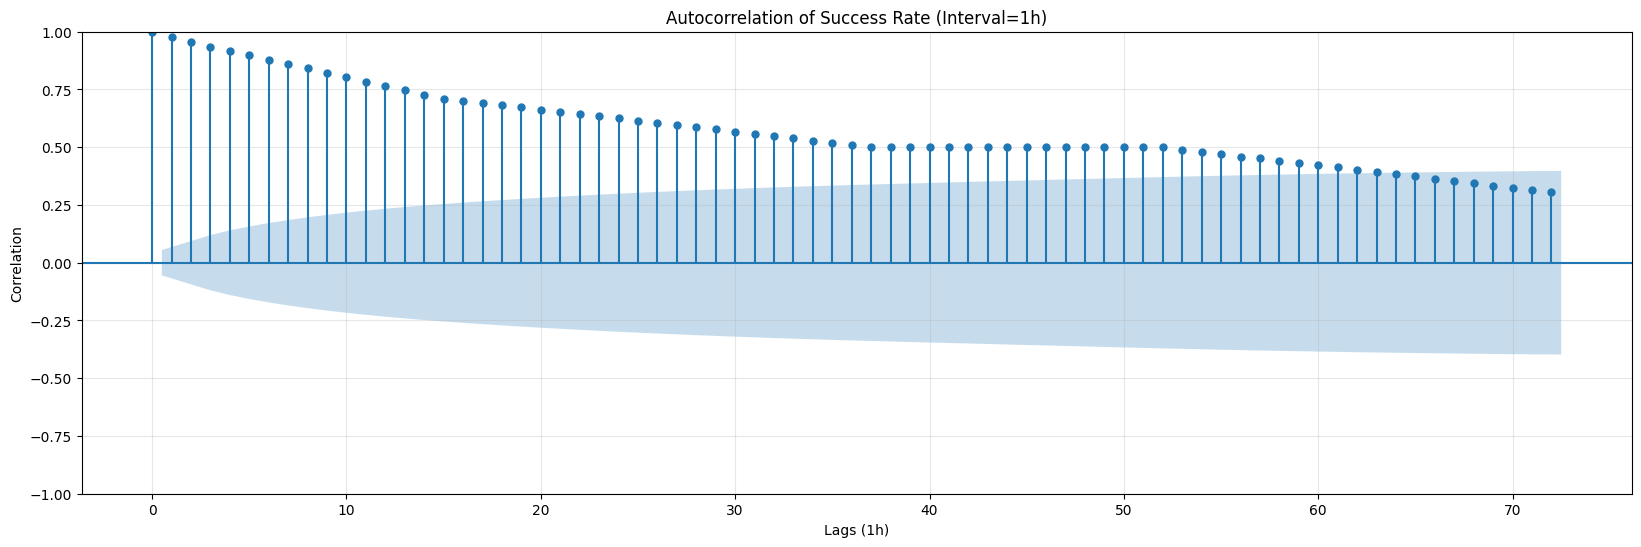

In [3]:
print("Autocorrelation - Hits:")
plot_utils.plot_autocorrelation(df, metric='hits', interval='1h')
print("Autocorrelation - File Size:")
plot_utils.plot_autocorrelation(df, metric='size', interval='1h')
print("Autocorrelation - Success Rate:")
plot_utils.plot_autocorrelation(df, metric='rate', interval='1h')

## Hypothesis 2: High traffic IP occurs at specific time in a day/ month

- For the absolute top traffic sources (Proxies): The hypothesis is False. They are active all day because they aggregate many users.
- For specific heavy users (e.g., 163...): The hypothesis is True. They show distinct active and inactive hours.

Analyzing Time-of-Day Activity for Top 10 IPs...


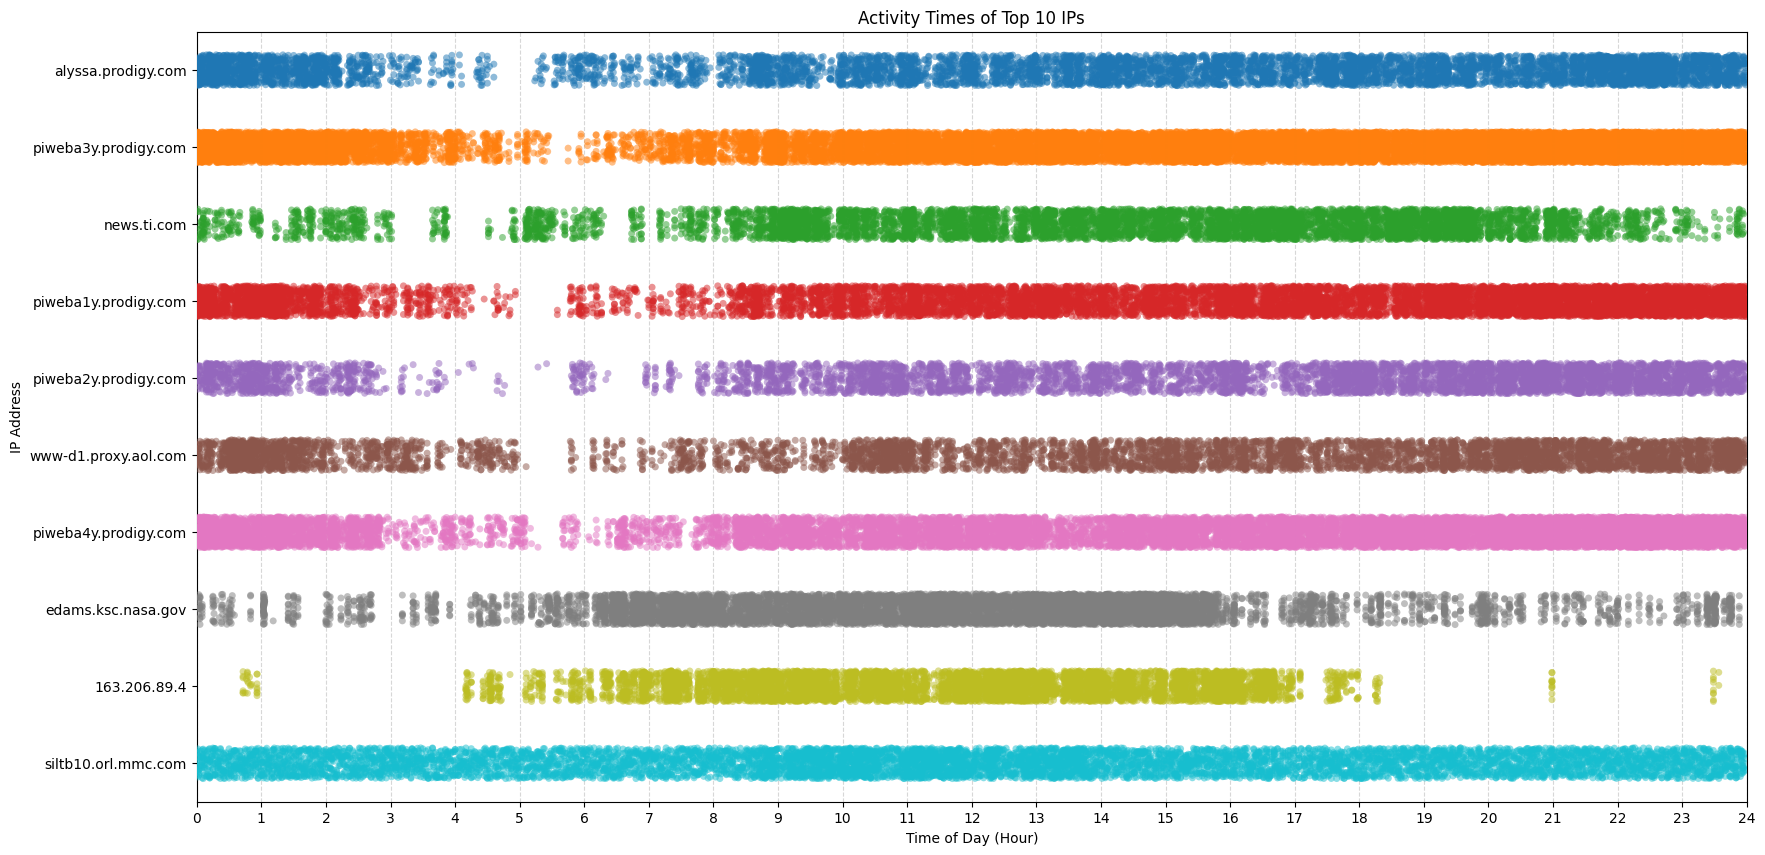

In [5]:
plot_utils.plot_top_ips_activity(df, top_n=10)

## Hypothesis 3: High frequency -> large file size, or vice versa, or no relation

Correlating Resource Frequency vs Size...


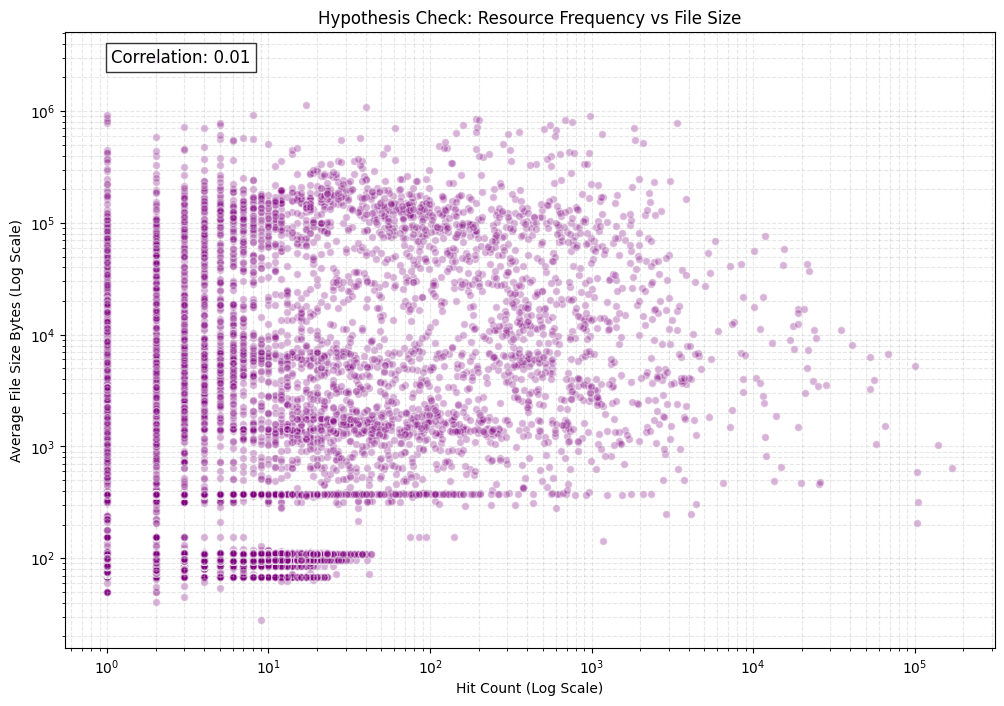

In [6]:
plot_utils.plot_frequency_vs_size(df)

## Hypothesis 4: Traffic at weekday is less than traffic at weekend

Comparing Weekday vs Weekend Traffic...
Mean Traffic per Interval:
Category
Weekday    2662.210586
Weekend    1486.690104
Name: hits, dtype: float64


/Volumes/HP_P900/Users/tungnguyen/Library/CloudStorage/GoogleDrive-nguyenlamtungthptltt@gmail.com/Meine Ablage/03_PersonalWork/FomoKaguya2026/eda/plot_utils.py:783: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='hits', data=analysis, ax=axes[0], palette='Set2')


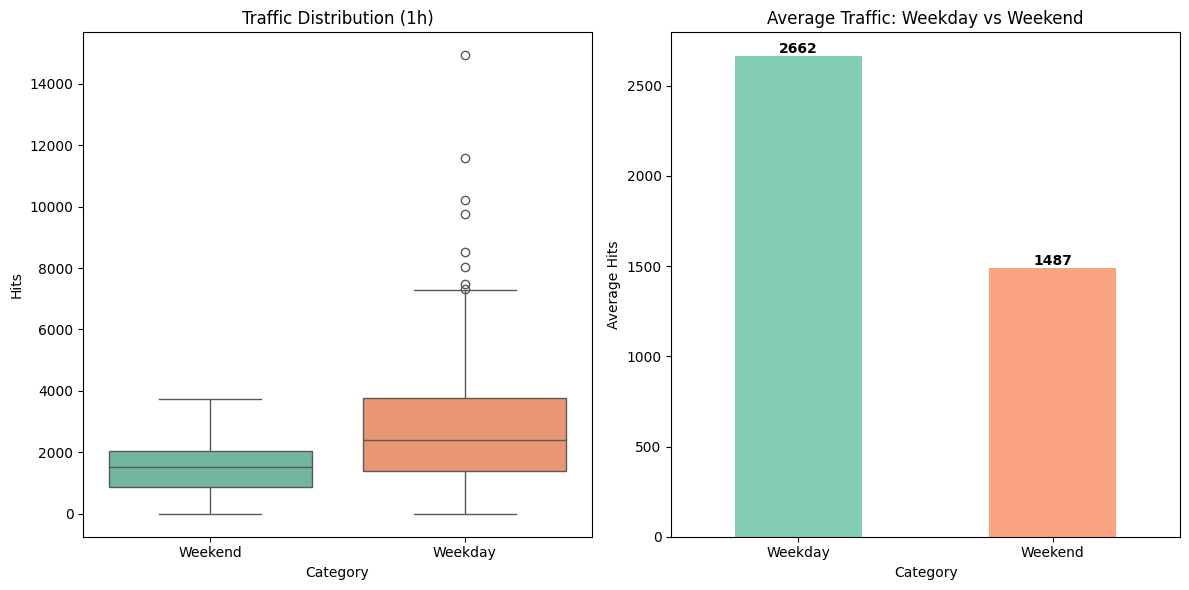

In [7]:
plot_utils.plot_weekday_vs_weekend(df, interval='1h')